# 1. Business Understanding

- This project is aimed at understanding the influence of various factors like economic, personal and social on the students performance, and if a student's performance can be predicted.

# 2. Data Acquisition and Understanding


## 2.1 Data Understanding

- Source : This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data).
- Format : This data was in a csv format.
- Content : The data had 1,000 rows and 8 columns.

The description of these columns:

1. gender : Whether a student was male or female
2. race/ethnicity : Ethnicity of student, acn be between Group(A, B, C, D, E)
3. parental level of education	: Details of parental education varying from high school to master's degree
4. lunch : Type of lunch selected
5. test preparation course	: Whether student completed preparation course before test
6. math score : Marks secured by a student in Mathematics
7. reading score : Marks secured by a student in Reading
8. writing score : Marks secured by a student in Writing

## 2.2 Data Acquisition

In [36]:
# importing libraries

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
# import warnings
# warnings.filterwarnings('ignore')

In [4]:
data_path = r"C:\Users\njamb\Desktop\DataScience\PerformanceAnalysis\Student-Performance-Analysis\data\raw\stud.csv"

In [6]:
# reading the data
data = pd.read_csv(data_path)

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns.")

The data has 1000 rows and 8 columns.


## 2.3 Data Cleaning

In [40]:
# checking if data has any missing values

data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- The data has no missing values

In [41]:
# checking if the data has any duplicates

print(f"The data has {data.duplicated().sum()} rows that are duplicates.")

The data has 0 rows that are duplicates.


In [42]:
# checking the data dtype of the columns

data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

- The columns have appropriate data types of the data they hold.

In [149]:
# checking number of unique values in columns

data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [152]:
# checking the unique data in the categorical columns

for i in data.columns[:-3]:
    print(f"Categories in {i} column are:")
    print(data[i].unique())
    print('-------------------------------------------------------')

Categories in gender column are:
['female' 'male']
-------------------------------------------------------
Categories in race_ethnicity column are:
['group B' 'group C' 'group A' 'group D' 'group E']
-------------------------------------------------------
Categories in parental_level_of_education column are:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-------------------------------------------------------
Categories in lunch column are:
['standard' 'free/reduced']
-------------------------------------------------------
Categories in test_preparation_course column are:
['none' 'completed']
-------------------------------------------------------


- The unique classes don't require any cleaning, hence can be left as they are

In [44]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [150]:
# checking statistics of data

data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- The mean scores for maths, reading and writing are close together, ranging between 66 and 68.
- The minimum score varies, with math having the lowest score of zero, then 10 by writing, followed by reading at 17.

In [170]:
# creating a column for sum and average of scores

data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average_score'] = data['total_score']/3

In [162]:
# definining categorical and numerical columns

categorical_columns = data.select_dtypes(include='object').columns.to_list()
numerical_columns = data.select_dtypes(exclude='object').columns.to_list()

In [166]:
print(f"The data has {len(categorical_columns)} categorical columns, which are : \n {categorical_columns}")
print('\n')
print(f"The data has {len(numerical_columns)} numerical columns, which are : \n {numerical_columns}")

The data has 5 categorical columns, which are : 
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


The data has 3 numerical columns, which are : 
 ['math_score', 'reading_score', 'writing_score']


## 2.4 EDA

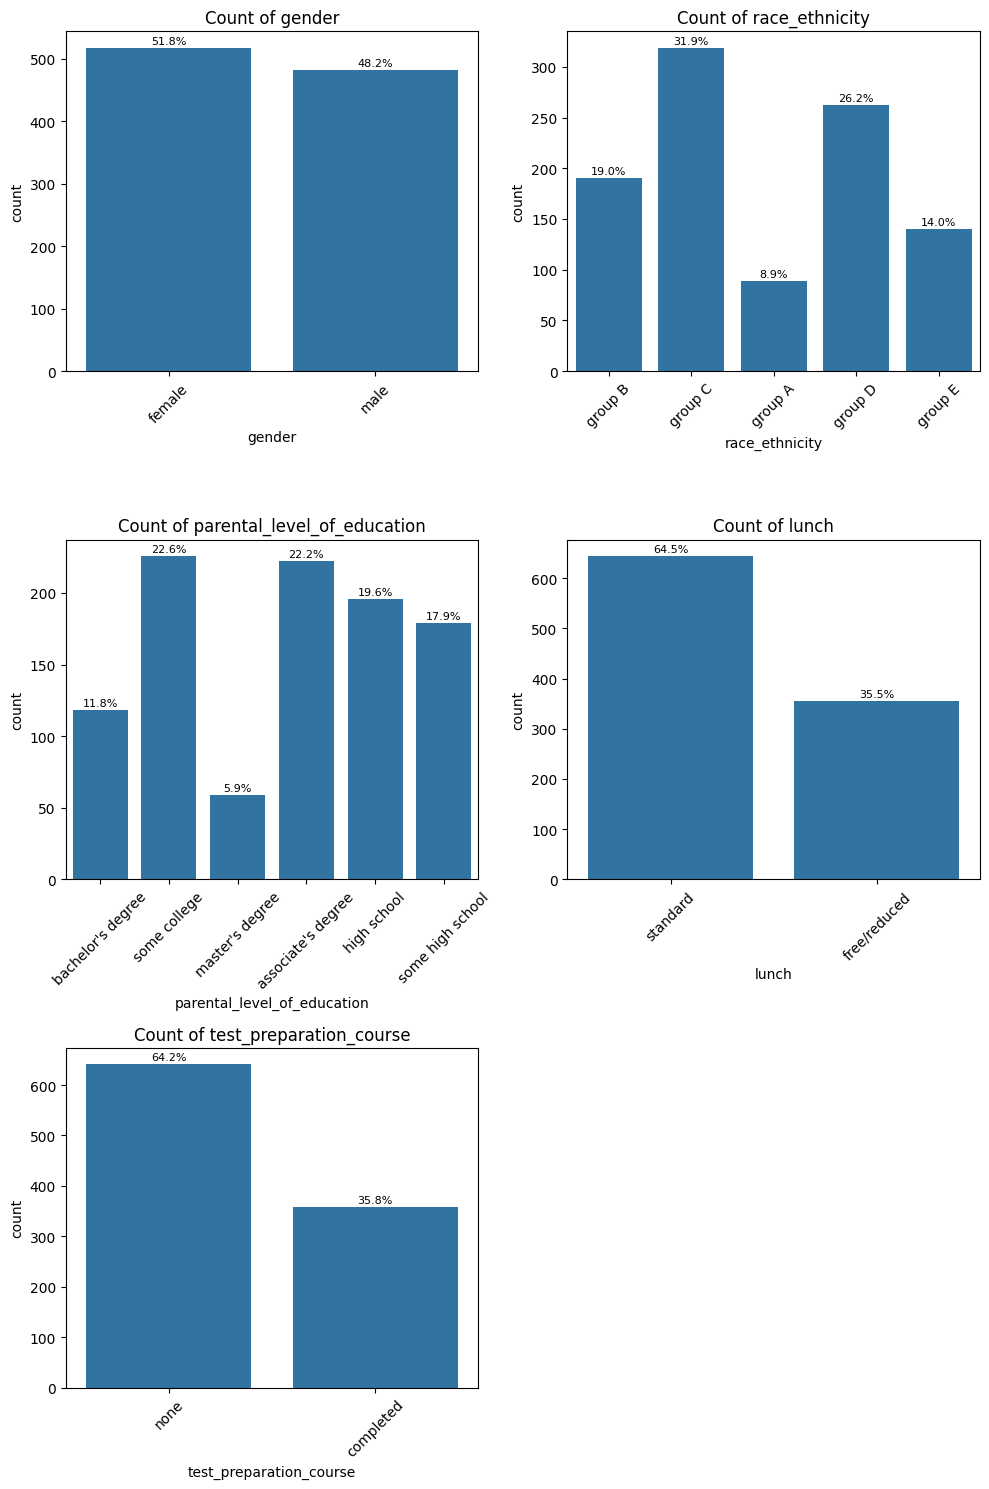

In [123]:
# plotting the count of the categorical columns

plt.figure(figsize=(10, 15))

for idx, column in enumerate(categorical_columns, 1):
    ax = plt.subplot(3, 2, idx)  
    sns.countplot(data=data, x=column, ax=ax)
    ax.set_xticks(range(len(ax.get_xticklabels())))  # Set tick positions
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
    
    # Calculate percentages
    total = len(data[column])
    for p in ax.patches:
        percentage = f"{round(100*(p.get_height()/total), 1)}%"
        ax.annotate(text=percentage, # text of annotation
                    xy=(p.get_x() + p.get_width() / 2., p.get_height()), #The point (x, y) to annotate
                    ha='center', 
                    va='center', 
                    fontsize=8, 
                    color='black', 
                    xytext=(0, 5), #The position (x, y) to place the text at
                    textcoords='offset points' #Offset, relative to fontsize, from the xy value
                    )
    ax.set_title(f"Count of {column}")

plt.tight_layout()  
plt.show()

- There are slightly more female students than male students.
- Most of the students come from Group C race, and group A has the least amount of students at 8.9%
- Most parents have some degree and associate degree for level of education.
- MOst students have standard lunches
- Most students don't take any test preparation course.

In [124]:
numerical_columns

['math_score', 'reading_score', 'writing_score']

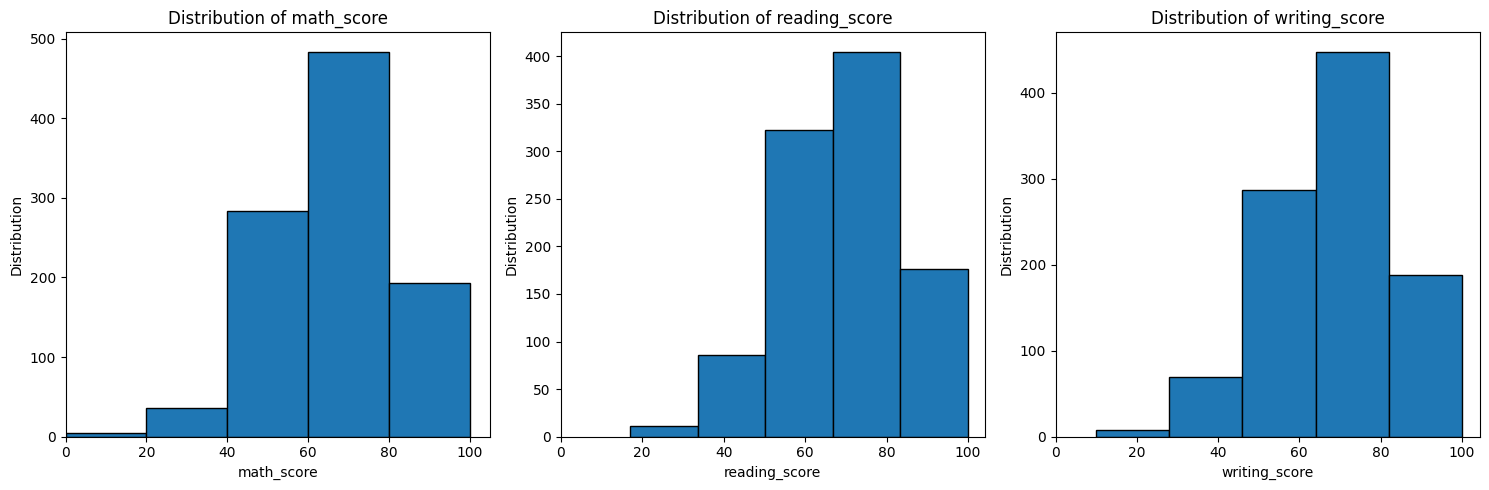

In [146]:
plt.figure(figsize=(15,5))

for idx, column in enumerate(numerical_columns, start=1):
    ax = plt.subplot(1,3, idx)
    plt.hist(x=data[column], bins=5, edgecolor='black')
    
    ax.set_xlim(0)
    ax.set_ylim(0)
    
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(f"{column}")
    ax.set_ylabel(f"Distribution")
    
plt.tight_layout();  

# 3. Modelling

# 4. Deployment